## **BÀI TẬP 1**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)  # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  # Lấy các features (TV, Radio, Newspaper)
  features_X = data[:, :3]
  # Lấy cột sales (cột thứ tư)
  sales_Y = data[:, 3]

  # Thêm cột bias (toàn bộ là 1) vào features_X
  bias_column = np.ones((features_X.shape[0], 1))  # Tạo một cột toàn 1
  features_X = np.hstack((bias_column, features_X))  # Thêm cột bias vào đầu features_X

  return features_X, sales_Y

In [ ]:
#Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [ ]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


## **BÀI TẬP 2**

In [ ]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound # Tạo giá trị ngẫu nhiên trong khoảng [-bound/2, bound/2]
# n = 4: Số lượng genes (tham số θ1, θ2, θ3, θ4)
def create_individual(n=4, bound=10):
    # Khởi tạo cá thể (chromosome) với n gene
    individual = [generate_random_value(bound) for _ in range(n)]

    return individual

In [ ]:
individual = create_individual()
print(individual)

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


## **BÀI TẬP 3**

Kỹ thuật xây dựng fitness function để đánh giá fitness score cho từng chromosome


In [ ]:
features_X, sales_Y = load_data_from_file()

def compute_loss(individual):
    theta = np.array(individual)      # Chuyển đổi cá thể thành mảng numpy
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 1/(1+loss)

    return fitness_value

In [ ]:
#Question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


## **BÀI TẬP 4**

Kỹ thuật thực hiện crossover giữa 2 chromosomes


Lai tạo (trao đổi gen) giữa 2 individual với tỉ lệ crossover_rate


In [ ]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    # Tạo bản sao của cá thể để giữ nguyên các gene gốc
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    # Thực hiện crossover cho từng gene
    for i in range(len(individual1)):
        if random.random() <= crossover_rate:  # Kiểm tra tỷ lệ crossover
            # Hoán đổi gene giữa hai cá thể
            individual1_new[i], individual2_new[i] = individual2_new[i], individual1_new[i]
    return individual1_new, individual2_new

In [ ]:
#Question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


## **BÀI TẬP 5**

Kỹ thuật mutation với chromosome: thực hiện việc đột biến cho một cá thể với tỉ lệ đột biến là mutation_rate

In [ ]:
def mutate(individual, mutation_rate = 0.05, bound = 10):
    # Sao chép cá thể gốc để giữ nguyên giá trị của nó
    individual_m = individual.copy()

    # Thực hiện đột biến cho từng gene trong cá thể
    for i in range(len(individual_m)):
        if random.random() <= mutation_rate:  # Kiểm tra tỷ lệ đột biến
            # Thay đổi gene tại vị trí i với giá trị ngẫu nhiên trong khoảng [-bound/2, bound/2]
            individual_m[i] = (random.random() - 0.5) * bound
    return individual_m      # Trả về cá thể đã được đột biến

In [ ]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


## **BÀI TẬP 6**

Khởi tạo population đầu tiên: khởi tạo m cá thể (individual, chromosome) cho population.


In [ ]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [ ]:
population = initializePopulation(100)
print(len(population))

100


## **BÀI TẬP 7**

Kỹ thuật selection để thực hiện việc chọc lọc tư nhiên, đào thải những cá thể yếu trong
population


In [ ]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [ ]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[-1.7707102346493941, -0.44255615074371035, -1.7485653418675173, -4.711708834619053]


## **BÀI TẬP 8**

Kỹ thuật tạo ra quần thể (population) mới:
sử
dụng giải thuật Elitist algorithms để đảm bảo rằng elitism cá thể tốt nhất không bị loại bỏ, bằng cách
chuyển chúng trực tiếp sang thế hệ tiếp theo.


In [ ]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    # Sắp xếp quần thể dựa trên giá trị fitness
    sorted_population = sorted(old_population, key=compute_fitness)

    # In ra giá trị loss tốt nhất trong thế hệ hiện tại
    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    # Chọn lọc và tạo cá thể mới cho đến khi đạt kích thước quần thể
    while len(new_population) < m-elitism:
        # Chọn lọc
        selected_individuals = selection(old_population, [compute_fitness(ind) for ind in old_population], num_parents=4)

        # Lai tạo (crossover)
        parent1, parent2 = random.sample(selected_individuals, 2)
        offspring1, offspring2 = crossover(parent1, parent2)

        # Đột biến
        offspring1 = mutate(offspring1, mutation_rate=0.05, bound=10)
        offspring2 = mutate(offspring2, mutation_rate=0.05, bound=10)

        # Thêm cá thể con vào quần thể mới
        new_population.append(offspring1)
        if len(new_population) < m - elitism:  # Đảm bảo không vượt quá kích thước quần thể
            new_population.append(offspring2)


    # Sao chép các cá thể tốt nhất vào thế hệ tiếp theo
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind)
    return new_population, compute_loss(sorted_population[m-1])    # Trả về quần thể mới và loss tốt nhất

In [ ]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


## **BÀI TẬP 9**

In [ ]:
def selection(population, fitness_values, num_selected=2):
    # Chọn ra các chỉ số của các cá thể có fitness cao nhất
    sorted_indices = np.argsort(fitness_values)[-num_selected:]
    selected_individuals = [population[i] for i in sorted_indices]

    return selected_individuals
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen % 1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m - elitism:
        # Lấy các chỉ số của các cá thể tốt nhất
        selected_individuals = selection(sorted_population, [compute_fitness(ind) for ind in sorted_population], num_selected=2)

        # crossover
        offspring1, offspring2 = crossover(selected_individuals[0], selected_individuals[1])

        # mutation
        offspring1 = mutate(offspring1)
        offspring2 = mutate(offspring2)

        # Thêm các offspring vào quần thể mới
        new_population.append(offspring1)
        new_population.append(offspring2)

    # Thêm elitism cá thể tốt nhất vào thế hệ tiếp theo
    for ind in sorted_population[m - elitism:]:
        new_population.append(ind)

    return new_population, compute_loss(sorted_population[m - 1])

def run_GA():
  # Số lượng thế hệ
  n_generations = 100
  # Kích thước quần thể
  m = 600
  features_X, sales_Y = load_data_from_file()
  # Khởi tạo quần thể ban đầu
  population = [create_individual(n=4, bound=10) for _ in range(m)]
  # Danh sách lưu trữ giá trị loss qua các thế hệ
  losses_list = []
  for i in range(n_generations):

        print(f"Generation {i + 1}")
        # Tính toán fitness cho từng cá thể trong quần thể
        fitness_values = [compute_fitness(individual) for individual in population]

        # Tạo ra quần thể mới
        population, best_loss = create_new_population(population, elitism=2, gen=i + 1)

        # Lưu trữ giá trị loss của cá thể tốt nhất
        losses_list.append(best_loss)

        # Điều kiện dừng sớm nếu loss đạt giá trị rất nhỏ
        if best_loss < 0.01:
            print(f"Early stopping at generation {i + 1} with best loss: {best_loss}")
            break

  return losses_list

In [ ]:
losses_list = run_GA()

Generation 1
Best loss: 801.0944473613437 with chromsome:  [-4.148158420364531, -0.15502496583643444, 0.7784333697735302, 0.1556526383431467]
Generation 2
Best loss: 202.18621610273607 with chromsome:  [-4.148158420364531, -0.04329063134705824, 0.7784333697735302, 0.1556526383431467]
Generation 3
Best loss: 171.59529070253987 with chromsome:  [-4.148158420364531, -0.023620864725304447, 0.7784333697735302, 0.1556526383431467]
Generation 4
Best loss: 166.1875138193451 with chromsome:  [-4.148158420364531, -0.023620864725304447, 0.7784333697735302, 0.1349274590543137]
Generation 5
Best loss: 142.79789597941647 with chromsome:  [-4.148158420364531, -0.023620864725304447, 0.6627302111155886, 0.1349274590543137]
Generation 6
Best loss: 132.67040503152285 with chromsome:  [-0.5042563080818163, -0.023620864725304447, 0.6627302111155886, 0.1349274590543137]
Generation 7
Best loss: 132.48366141397048 with chromsome:  [-0.924670393292476, -0.023620864725304447, 0.6627302111155886, 0.1349274590543

# **BÀI TẬP 10**

Trực quan hoá loss values


Generation 1
Best loss: 1661.7624570379887 with chromsome:  [-0.9922037645525328, -0.15259281039298855, 2.675510938639656, -0.4222218988229032]
Generation 2
Best loss: 396.4176043013792 with chromsome:  [2.7929703787069737, -0.014191468964532827, -0.6472571103525038, 0.915782748829097]
Generation 3
Best loss: 101.66796519398103 with chromsome:  [2.7929703787069737, -0.014191468964532827, 0.10268815856340541, 0.38621261559938613]
Generation 4
Best loss: 90.64926531231626 with chromsome:  [2.7929703787069737, -0.014191468964532827, 0.10268815856340541, 0.187792380300007]
Generation 5
Best loss: 72.22114672657624 with chromsome:  [4.511235035236325, -0.014191468964532827, 0.10268815856340541, 0.18564103724453052]
Generation 6
Best loss: 69.42470188800557 with chromsome:  [4.822693705970887, -0.014191468964532827, 0.10268815856340541, 0.18564103724453052]
Generation 7
Best loss: 61.237333216976225 with chromsome:  [4.822693705970887, -0.014191468964532827, 0.2580172733119446, 0.18564103724

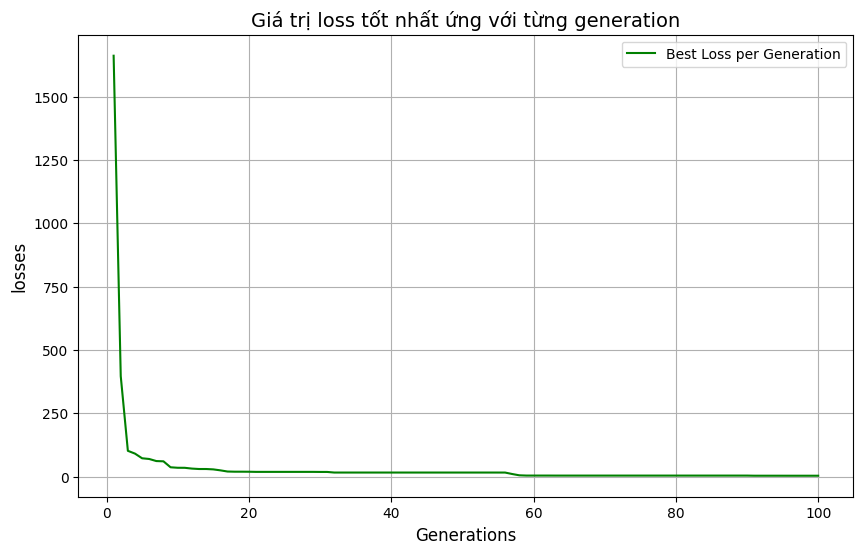

In [ ]:
def visualize_loss(losses_list):
    # Xác định số thế hệ dựa vào chiều dài của danh sách losses_list
    generations = list(range(1, len(losses_list) + 1))

    # Vẽ biểu đồ loss theo số thế hệ
    plt.figure(figsize=(10, 6))
    plt.plot(generations, losses_list, color='green', linestyle='-', markersize=5, label='Best Loss per Generation')

    # Thêm nhãn cho trục và tiêu đề cho biểu đồ
    plt.xlabel('Generations', fontsize=12)
    plt.ylabel('losses', fontsize=12)
    plt.title('Giá trị loss tốt nhất ứng với từng generation', fontsize=14)

    # Hiển thị legend và grid
    plt.legend()
    plt.grid(True)

    # Hiển thị biểu đồ
    plt.show()

losses_list = run_GA()
visualize_loss(losses_list)

## **BÀI TẬP 11**

Trực quan hoá kết quả dự đoán sales và giá trị thực tế


[-1.4692891827648635, -0.4170567502126088, 1.318794317305464, 0.16124298167449536]


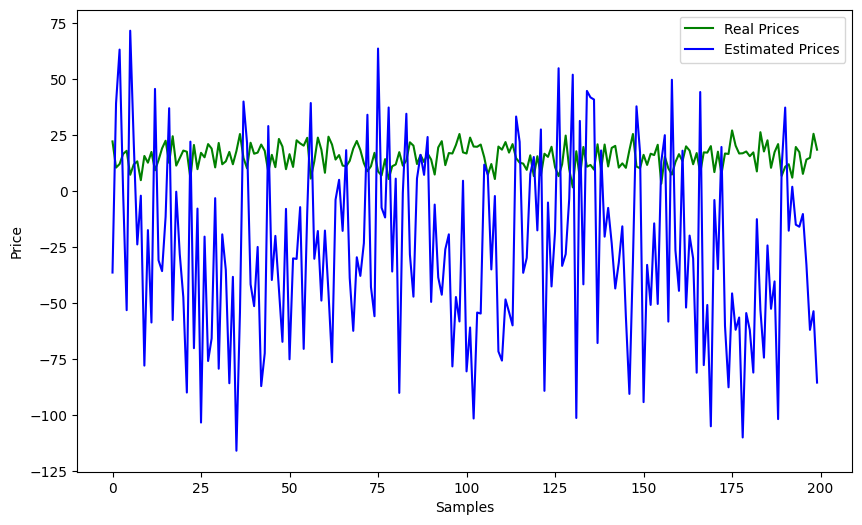

In [ ]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
     y_pred = np.dot(theta, feature)
     estimated_prices.append(y_pred)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()

[-1.4692891827648635, -0.4170567502126088, 1.318794317305464, 0.16124298167449536]


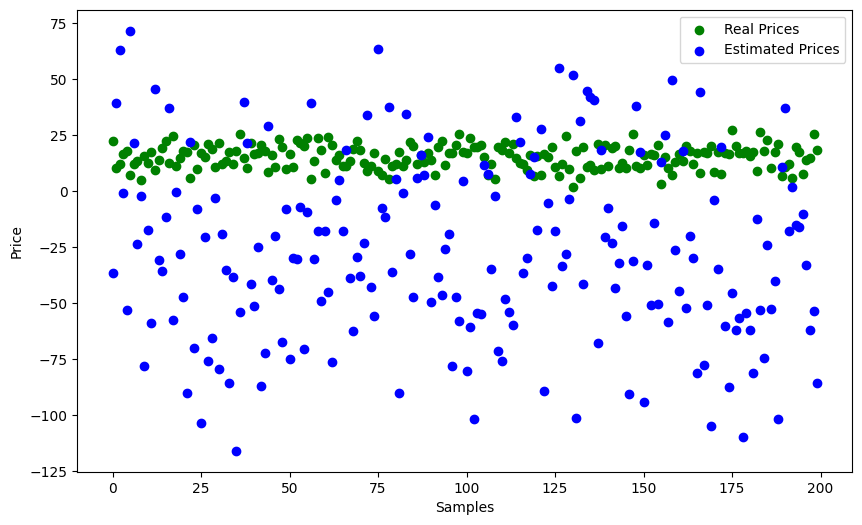

In [ ]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()